In [1]:
import sys

sys.path.append("C:\\Users\\Gabija\\anaconda3\\Lib\\site-packages")
import nb_black

%load_ext nb_black

<IPython.core.display.Javascript object>

In [2]:
from IPython.display import Image
import myfunctions
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from csv import QUOTE_NONNUMERIC, QUOTE_NONE

%matplotlib inline
import warnings


from sklearn import set_config
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, FunctionTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    roc_auc_score,
    classification_report,
    accuracy_score,
    roc_curve,
    confusion_matrix,
    ConfusionMatrixDisplay,
)
from sklearn.model_selection import train_test_split
import lightgbm as lgb
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier

set_config(transform_output="pandas")

warnings.filterwarnings("ignore")
pd.set_option("display.max_rows", None, "display.max_columns", None)
print("Setup complete")

Setup complete


<IPython.core.display.Javascript object>

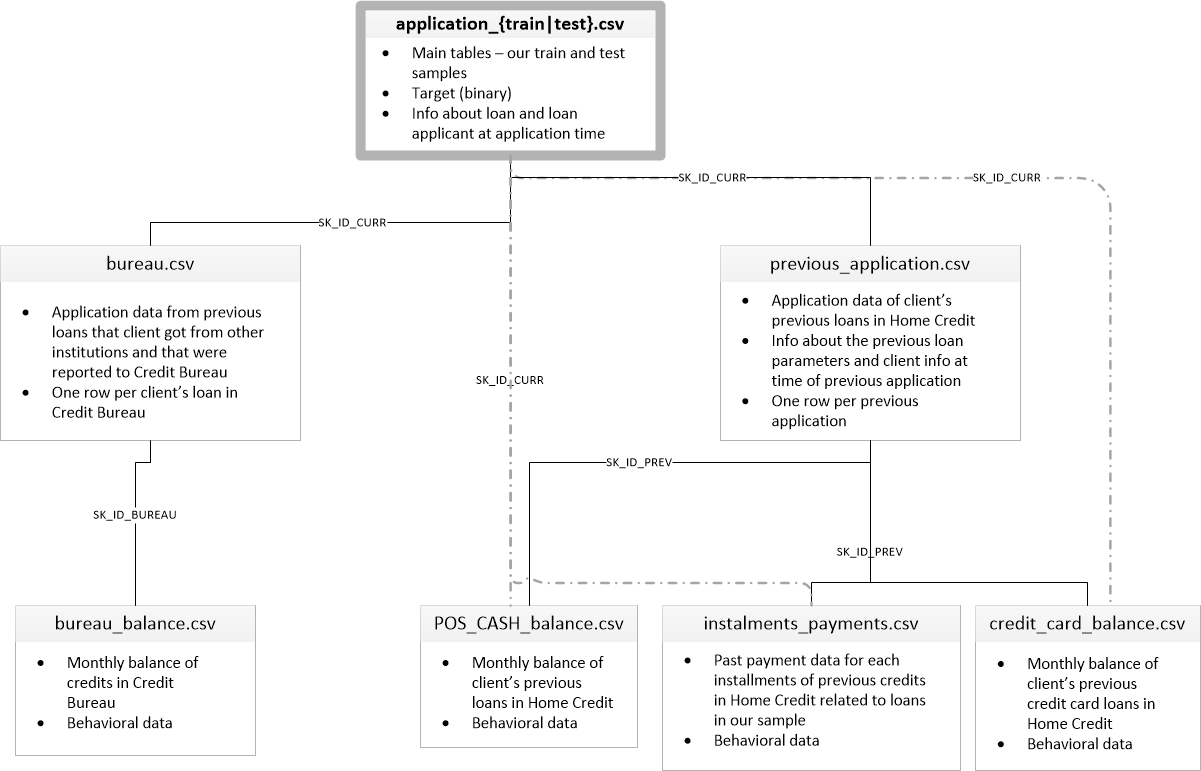

<IPython.core.display.Javascript object>

In [3]:
Image(filename="home_credit.png")

In [3]:
columns_description = pd.read_csv(
    "HomeCredit_columns_description.csv",
    encoding="latin-1",
    usecols=["Table", "Row", "Description"],
)
columns_description.style.set_properties(subset=["Description"], **{"width": "1000px"})

,Table,Row,Description
0,application_{train|test}.csv,SK_ID_CURR,ID of loan in our sample
1,application_{train|test}.csv,TARGET,"Target variable (1 - client with payment difficulties: he/she had late payment more than X days on at least one of the first Y installments of the loan in our sample, 0 - all other cases)"
2,application_{train|test}.csv,NAME_CONTRACT_TYPE,Identification if loan is cash or revolving
3,application_{train|test}.csv,CODE_GENDER,Gender of the client
4,application_{train|test}.csv,FLAG_OWN_CAR,Flag if the client owns a car
5,application_{train|test}.csv,FLAG_OWN_REALTY,Flag if client owns a house or flat
6,application_{train|test}.csv,CNT_CHILDREN,Number of children the client has
7,application_{train|test}.csv,AMT_INCOME_TOTAL,Income of the client
8,application_{train|test}.csv,AMT_CREDIT,Credit amount of the loan
9,application_{train|test}.csv,AMT_ANNUITY,Loan annuity


<IPython.core.display.Javascript object>

* All previous applications for Home Credit loans of clients who have loans in our sample.
* There is one row for each previous application related to loans in our data sample.

In [3]:
pr_applications = pd.read_csv("previous_application.csv")
pr_applications = myfunctions.reduce_mem_usage(pr_applications)
print("Size of previous application table", pr_applications.shape)
pr_applications.head()

Size of previous application table (1670214, 37)


,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430054,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182861,0.867188,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615234,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735352,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335938,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.394531,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


<IPython.core.display.Javascript object>

In [7]:
pr_applications.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int32  
 1   SK_ID_CURR                   1670214 non-null  int32  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float32
 4   AMT_APPLICATION              1670214 non-null  float32
 5   AMT_CREDIT                   1670213 non-null  float32
 6   AMT_DOWN_PAYMENT             774370 non-null   float32
 7   AMT_GOODS_PRICE              1284699 non-null  float32
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int8   
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int8   
 12  RATE_DOWN_PAYMENT            774370 non-nu

<IPython.core.display.Javascript object>

In [8]:
pr_applications.describe()

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,1.670214e+06,1.670214e+06,1.297979e+06,1.670214e+06,1.670213e+06,7.743700e+05,1.284699e+06,1.670214e+06,1.670214e+06,774370.000000,5951.000000,5951.000000,1.670214e+06,1.670214e+06,1297984.0,997149.000000,997149.000000,997149.000000,997149.00000,997149.000000,997149.0
mean,1.923089e+06,2.783572e+05,1.595512e+04,1.752339e+05,1.961140e+05,6.697401e+03,2.278472e+05,1.248418e+01,9.964675e-01,0.000000,0.188477,0.774902,-8.806797e+02,3.139511e+02,NaN,342209.781250,13826.266602,33767.769531,76582.40625,81992.343750,NaN
std,5.325980e+05,1.028148e+05,1.478214e+04,2.927798e+05,3.185746e+05,2.092150e+04,3.153966e+05,3.334028e+00,5.932963e-02,0.000000,0.087646,0.100708,7.790997e+02,7.127443e+03,0.0,88916.117188,72444.867188,106857.031250,149647.40625,153303.515625,0.0
min,1.000001e+06,1.000010e+05,0.000000e+00,0.000000e+00,0.000000e+00,-9.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,-0.000015,0.034790,0.373047,-2.922000e+03,-1.000000e+00,0.0,-2922.000000,-2892.000000,-2801.000000,-2889.00000,-2874.000000,0.0
25%,1.461857e+06,1.893290e+05,6.321780e+03,1.872000e+04,2.416050e+04,0.000000e+00,5.084100e+04,1.000000e+01,1.000000e+00,0.000000,0.160767,0.715820,-1.300000e+03,-1.000000e+00,6.0,365243.000000,-1628.000000,-1242.000000,-1314.00000,-1270.000000,0.0
50%,1.923110e+06,2.787145e+05,1.125000e+04,7.104600e+04,8.054100e+04,1.638000e+03,1.123200e+05,1.200000e+01,1.000000e+00,0.051605,0.189087,0.834961,-5.810000e+02,3.000000e+00,12.0,365243.000000,-831.000000,-361.000000,-537.00000,-499.000000,0.0
75%,2.384280e+06,3.675140e+05,2.065842e+04,1.803600e+05,2.164185e+05,7.740000e+03,2.340000e+05,1.500000e+01,1.000000e+00,0.108887,0.193359,0.852539,-2.800000e+02,8.200000e+01,24.0,365243.000000,-411.000000,129.000000,-74.00000,-44.000000,1.0
max,2.845382e+06,4.562550e+05,4.180582e+05,6.905160e+06,6.905160e+06,3.060045e+06,6.905160e+06,2.300000e+01,1.000000e+00,1.000000,1.000000,1.000000,-1.000000e+00,4.000000e+06,84.0,365243.000000,365243.000000,365243.000000,365243.00000,365243.000000,1.0


<IPython.core.display.Javascript object>

In [9]:
myfunctions.single_value_features(pr_applications)

[]

<IPython.core.display.Javascript object>

* One loan in our sample can have 0,1,2 or more previous loan applications in HC, previous application could, but not necessarily have to lead to credit; 
* I will deal with duplicates further in my analysis:

In [12]:
pr_applications["SK_ID_CURR"].duplicated().sum()

1331357

<IPython.core.display.Javascript object>

* Checking unique values in dataset:

In [11]:
pr_applications.select_dtypes("object").apply(pd.Series.nunique, axis=0)

NAME_CONTRACT_TYPE              4
WEEKDAY_APPR_PROCESS_START      7
FLAG_LAST_APPL_PER_CONTRACT     2
NAME_CASH_LOAN_PURPOSE         25
NAME_CONTRACT_STATUS            4
NAME_PAYMENT_TYPE               4
CODE_REJECT_REASON              9
NAME_TYPE_SUITE                 7
NAME_CLIENT_TYPE                4
NAME_GOODS_CATEGORY            28
NAME_PORTFOLIO                  5
NAME_PRODUCT_TYPE               3
CHANNEL_TYPE                    8
NAME_SELLER_INDUSTRY           11
NAME_YIELD_GROUP                5
PRODUCT_COMBINATION            17
dtype: int64

<IPython.core.display.Javascript object>

* There are features with severe mising values ammount, I will check with those doring feature selection stage:

In [10]:
myfunctions.missing_values_summary(pr_applications)

There are 16 columns that have missing values.


,Missing Values,% of Total Values,type
RATE_INTEREST_PRIMARY,1664263,99.6437,float16
RATE_INTEREST_PRIVILEGED,1664263,99.6437,float16
AMT_DOWN_PAYMENT,895844,53.6365,float32
RATE_DOWN_PAYMENT,895844,53.6365,float16
NAME_TYPE_SUITE,820405,49.1198,object
DAYS_FIRST_DRAWING,673065,40.2981,float32
DAYS_FIRST_DUE,673065,40.2981,float32
DAYS_LAST_DUE_1ST_VERSION,673065,40.2981,float32
DAYS_LAST_DUE,673065,40.2981,float32
DAYS_TERMINATION,673065,40.2981,float32


<IPython.core.display.Javascript object>

In [4]:
# single client example:
pr_applications[pr_applications["SK_ID_CURR"] == 363914].head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
9941,2826458,363914,Cash loans,NaN,0.0,0.0,NaN,NaN,MONDAY,14,Y,1,NaN,NaN,NaN,XNA,Canceled,-179,XNA,XAP,NaN,Repeater,XNA,XNA,XNA,Credit and cash offices,-1,XNA,NaN,XNA,Cash,NaN,NaN,NaN,NaN,NaN,NaN
237313,1982022,363914,Cash loans,48654.179688,679500.0,832122.0,NaN,679500.0,THURSDAY,12,Y,1,NaN,NaN,NaN,XNA,Refused,-519,Cash through the bank,HC,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,24.0,middle,Cash X-Sell: middle,NaN,NaN,NaN,NaN,NaN,NaN
237314,2569227,363914,Cash loans,NaN,0.0,0.0,NaN,NaN,MONDAY,14,Y,1,NaN,NaN,NaN,XNA,Canceled,-179,XNA,XAP,NaN,Repeater,XNA,XNA,XNA,Credit and cash offices,-1,XNA,NaN,XNA,Cash,NaN,NaN,NaN,NaN,NaN,NaN
343891,2408584,363914,Cash loans,16075.080078,135000.0,173839.5,NaN,135000.0,TUESDAY,13,Y,1,NaN,NaN,NaN,Urgent needs,Approved,-465,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,18.0,high,Cash Street: high,365243.0,-435.0,75.0,-285.0,-278.0,1.0
481055,2767643,363914,Revolving loans,13500.000000,270000.0,270000.0,NaN,270000.0,MONDAY,12,Y,1,NaN,NaN,NaN,XAP,Refused,-571,XNA,HC,NaN,Repeater,XNA,Cards,walk-in,Credit and cash offices,-1,XNA,0.0,XNA,Card Street,NaN,NaN,NaN,NaN,NaN,NaN


<IPython.core.display.Javascript object>

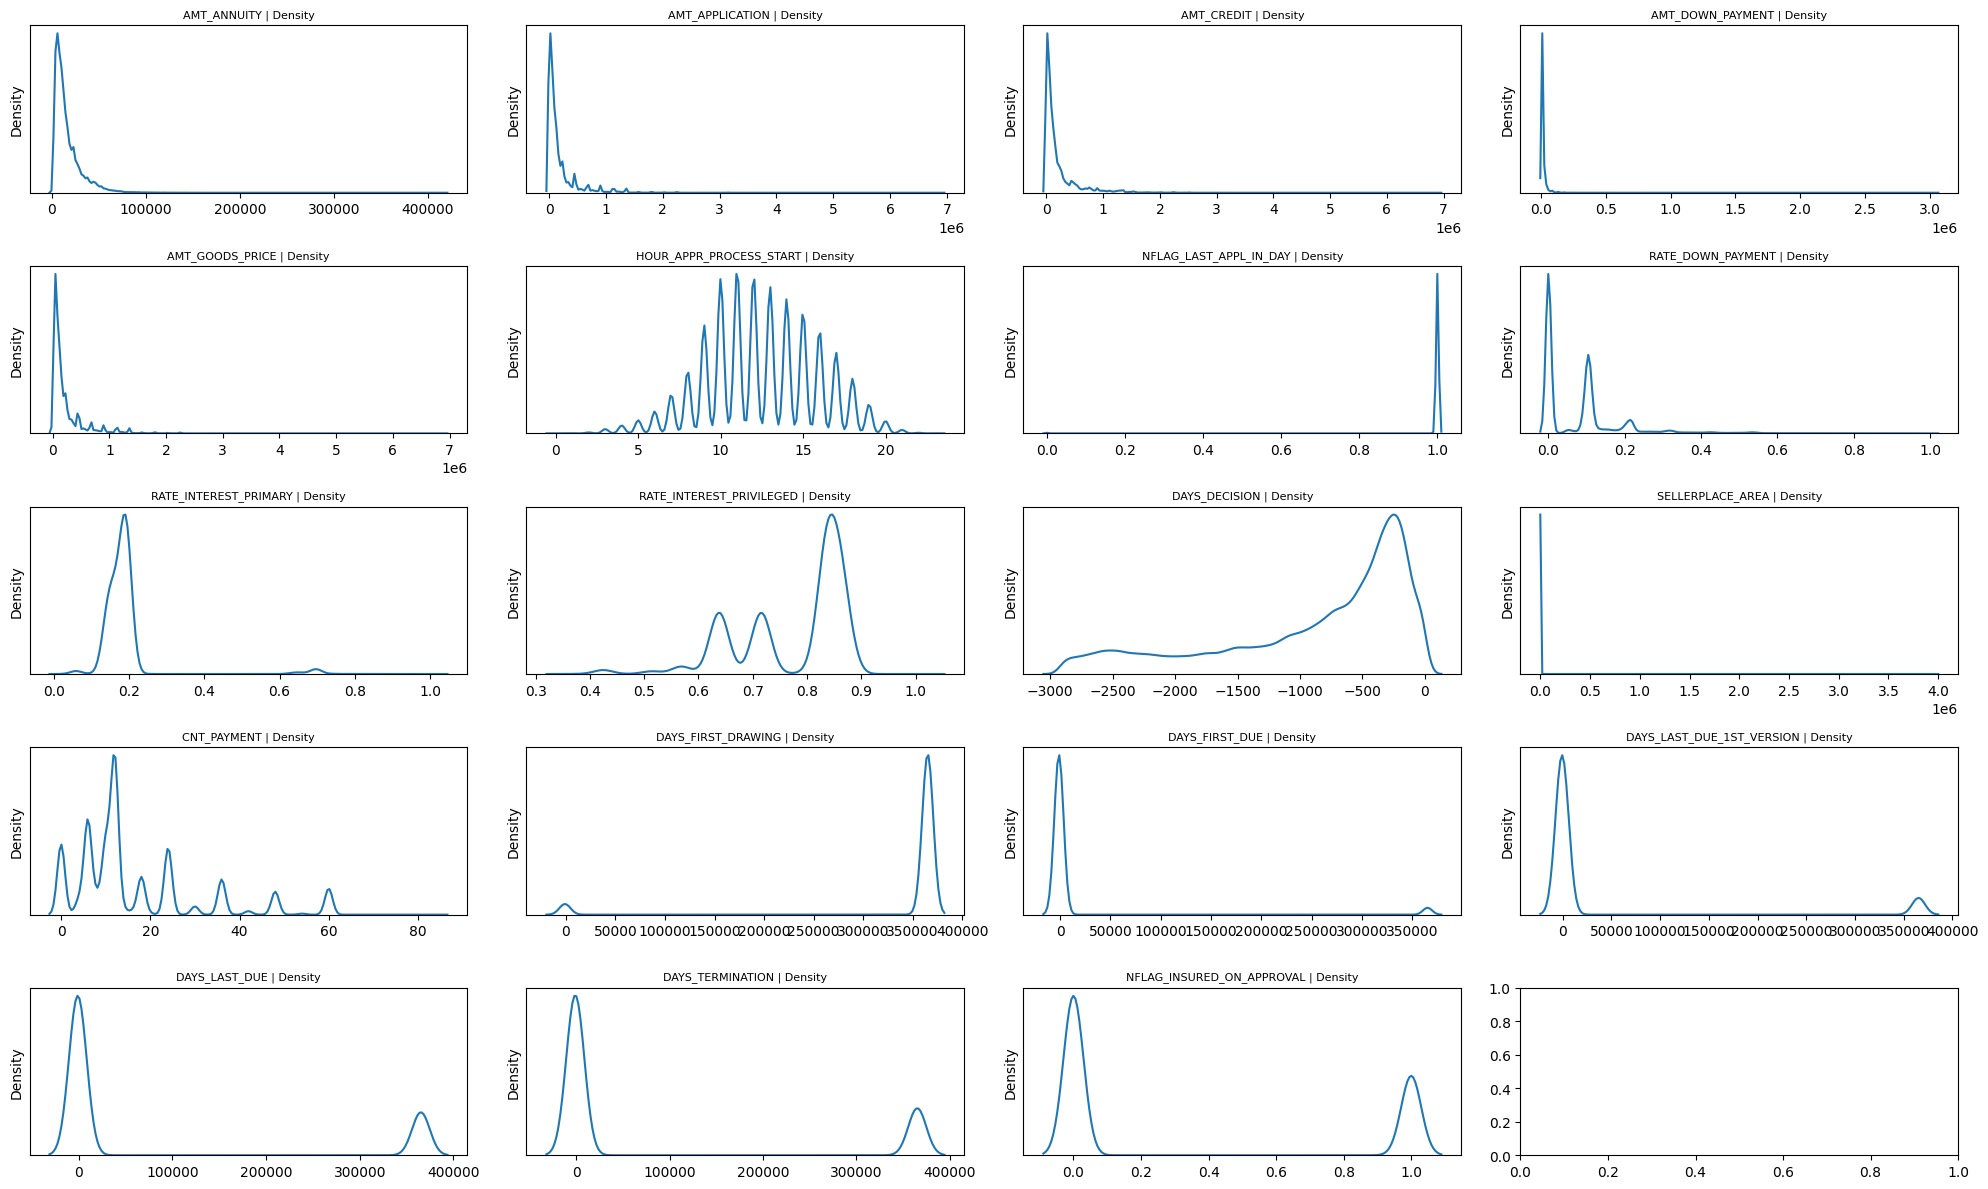

<IPython.core.display.Javascript object>

In [4]:
# checking distribution of numeric values:
myfunctions.previous_plot_kde_density(pr_applications)

* based on "NAME_CONTRACT_STATUS" I will create additional features: 

In [5]:
pr_applications["NAME_CONTRACT_STATUS"].value_counts()

NAME_CONTRACT_STATUS
Approved        1036781
Canceled         316319
Refused          290678
Unused offer      26436
Name: count, dtype: int64

<IPython.core.display.Javascript object>

In [8]:
transformer_features = FunctionTransformer(myfunctions.pr_application_combine_categories)
combine_categories = Pipeline(steps=[("combine_categ", transformer_features)])
pr_applications = combine_categories.fit_transform(pr_applications)
pr_applications.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL,REQUES_GET_DIFFERENCE,APPLIED_CREDIT_PERCENT
0,2030495,271877,Consumer loans,1730.430054,17145.0,17145.0,0.0,17145.0,WEEKEND,Work_hours,Y,1,0.0,0.182861,0.867188,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0,0.0,1.000000
1,2802425,108129,Cash loans,25188.615234,607500.0,679671.0,NaN,607500.0,WORKING_DAY,Work_hours,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0,-72171.0,0.893815
2,2523466,122040,Cash loans,15060.735352,112500.0,136444.5,NaN,112500.0,WORKING_DAY,Work_hours,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,not_alone,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0,-23944.5,0.824511
3,2819243,176158,Cash loans,47041.335938,450000.0,470790.0,NaN,450000.0,WORKING_DAY,Work_hours,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0,-20790.0,0.955840
4,1784265,202054,Cash loans,31924.394531,337500.0,404055.0,NaN,337500.0,WORKING_DAY,Work_hours,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN,-66555.0,0.835282


<IPython.core.display.Javascript object>

In [9]:
pr_applications.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 39 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int32  
 1   SK_ID_CURR                   1670214 non-null  int32  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float32
 4   AMT_APPLICATION              1670214 non-null  float32
 5   AMT_CREDIT                   1670213 non-null  float32
 6   AMT_DOWN_PAYMENT             774370 non-null   float32
 7   AMT_GOODS_PRICE              1284699 non-null  float32
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  object 
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int8   
 12  RATE_DOWN_PAYMENT            774370 non-nu

<IPython.core.display.Javascript object>

In [4]:
transformer = ColumnTransformer(
    transformers=[
        (
            "encode",
            OneHotEncoder(sparse=False),
            [
                "NAME_CONTRACT_STATUS",
                "NAME_CONTRACT_TYPE",
                "WEEKDAY_APPR_PROCESS_START",
                "HOUR_APPR_PROCESS_START",
                "FLAG_LAST_APPL_PER_CONTRACT",
                "NAME_CASH_LOAN_PURPOSE",
                "NAME_PAYMENT_TYPE",
                "CODE_REJECT_REASON",
                "NAME_TYPE_SUITE",
                "NAME_CLIENT_TYPE",
                "NAME_GOODS_CATEGORY",
                "NAME_PORTFOLIO",
                "NAME_PRODUCT_TYPE",
                "CHANNEL_TYPE",
                "NAME_SELLER_INDUSTRY",
                "NAME_YIELD_GROUP",
                "PRODUCT_COMBINATION",
            ],
        )
    ],
    remainder="passthrough",
    verbose_feature_names_out=False,
)
pr_applications = transformer.fit_transform(pr_applications)
pr_applications = pr_applications.rename(
    columns=lambda x: re.sub("[^A-Za-z0-9_]+", "", x)
)
pr_applications = myfunctions.reduce_mem_usage(pr_applications)

<IPython.core.display.Javascript object>

In [5]:
pr_applications.head()

,NAME_CONTRACT_STATUS_Approved,NAME_CONTRACT_STATUS_Canceled,NAME_CONTRACT_STATUS_Refused,NAME_CONTRACT_STATUS_Unusedoffer,NAME_CONTRACT_TYPE_Cashloans,NAME_CONTRACT_TYPE_Consumerloans,NAME_CONTRACT_TYPE_Revolvingloans,NAME_CONTRACT_TYPE_XNA,WEEKDAY_APPR_PROCESS_START_FRIDAY,WEEKDAY_APPR_PROCESS_START_MONDAY,WEEKDAY_APPR_PROCESS_START_SATURDAY,WEEKDAY_APPR_PROCESS_START_SUNDAY,WEEKDAY_APPR_PROCESS_START_THURSDAY,WEEKDAY_APPR_PROCESS_START_TUESDAY,WEEKDAY_APPR_PROCESS_START_WEDNESDAY,HOUR_APPR_PROCESS_START_0,HOUR_APPR_PROCESS_START_1,HOUR_APPR_PROCESS_START_2,HOUR_APPR_PROCESS_START_3,HOUR_APPR_PROCESS_START_4,HOUR_APPR_PROCESS_START_5,HOUR_APPR_PROCESS_START_6,HOUR_APPR_PROCESS_START_7,HOUR_APPR_PROCESS_START_8,HOUR_APPR_PROCESS_START_9,HOUR_APPR_PROCESS_START_10,HOUR_APPR_PROCESS_START_11,HOUR_APPR_PROCESS_START_12,HOUR_APPR_PROCESS_START_13,HOUR_APPR_PROCESS_START_14,HOUR_APPR_PROCESS_START_15,HOUR_APPR_PROCESS_START_16,HOUR_APPR_PROCESS_START_17,HOUR_APPR_PROCESS_START_18,HOUR_APPR_PROCESS_START_19,HOUR_APPR_PROCESS_START_20,HOUR_APPR_PROCESS_START_21,HOUR_APPR_PROCESS_START_22,HOUR_APPR_PROCESS_START_23,FLAG_LAST_APPL_PER_CONTRACT_N,FLAG_LAST_APPL_PER_CONTRACT_Y,NAME_CASH_LOAN_PURPOSE_Buildingahouseoranannex,NAME_CASH_LOAN_PURPOSE_Businessdevelopment,NAME_CASH_LOAN_PURPOSE_Buyingagarage,NAME_CASH_LOAN_PURPOSE_Buyingaholidayhomeland,NAME_CASH_LOAN_PURPOSE_Buyingahome,NAME_CASH_LOAN_PURPOSE_Buyinganewcar,NAME_CASH_LOAN_PURPOSE_Buyingausedcar,NAME_CASH_LOAN_PURPOSE_Carrepairs,NAME_CASH_LOAN_PURPOSE_Education,NAME_CASH_LOAN_PURPOSE_Everydayexpenses,NAME_CASH_LOAN_PURPOSE_Furniture,NAME_CASH_LOAN_PURPOSE_Gasificationwatersupply,NAME_CASH_LOAN_PURPOSE_Hobby,NAME_CASH_LOAN_PURPOSE_Journey,NAME_CASH_LOAN_PURPOSE_Medicine,NAME_CASH_LOAN_PURPOSE_Moneyforathirdperson,NAME_CASH_LOAN_PURPOSE_Other,NAME_CASH_LOAN_PURPOSE_Paymentsonotherloans,NAME_CASH_LOAN_PURPOSE_Purchaseofelectronicequipment,NAME_CASH_LOAN_PURPOSE_Refusaltonamethegoal,NAME_CASH_LOAN_PURPOSE_Repairs,NAME_CASH_LOAN_PURPOSE_Urgentneeds,NAME_CASH_LOAN_PURPOSE_Weddinggiftholiday,NAME_CASH_LOAN_PURPOSE_XAP,NAME_CASH_LOAN_PURPOSE_XNA,NAME_PAYMENT_TYPE_Cashthroughthebank,NAME_PAYMENT_TYPE_Cashlessfromtheaccountoftheemployer,NAME_PAYMENT_TYPE_Noncashfromyouraccount,NAME_PAYMENT_TYPE_XNA,CODE_REJECT_REASON_CLIENT,CODE_REJECT_REASON_HC,CODE_REJECT_REASON_LIMIT,CODE_REJECT_REASON_SCO,CODE_REJECT_REASON_SCOFR,CODE_REJECT_REASON_SYSTEM,CODE_REJECT_REASON_VERIF,CODE_REJECT_REASON_XAP,CODE_REJECT_REASON_XNA,NAME_TYPE_SUITE_Children,NAME_TYPE_SUITE_Family,NAME_TYPE_SUITE_Groupofpeople,NAME_TYPE_SUITE_Other_A,NAME_TYPE_SUITE_Other_B,NAME_TYPE_SUITE_Spousepartner,NAME_TYPE_SUITE_Unaccompanied,NAME_TYPE_SUITE_nan,NAME_CLIENT_TYPE_New,NAME_CLIENT_TYPE_Refreshed,NAME_CLIENT_TYPE_Repeater,NAME_CLIENT_TYPE_XNA,NAME_GOODS_CATEGORY_AdditionalService,NAME_GOODS_CATEGORY_Animals,NAME_GOODS_CATEGORY_AudioVideo,NAME_GOODS_CATEGORY_AutoAccessories,NAME_GOODS_CATEGORY_ClothingandAccessories,NAME_GOODS_CATEGORY_Computers,NAME_GOODS_CATEGORY_ConstructionMaterials,NAME_GOODS_CATEGORY_ConsumerElectronics,NAME_GOODS_CATEGORY_DirectSales,NAME_GOODS_CATEGORY_Education,NAME_GOODS_CATEGORY_Fitness,NAME_GOODS_CATEGORY_Furniture,NAME_GOODS_CATEGORY_Gardening,NAME_GOODS_CATEGORY_Homewares,NAME_GOODS_CATEGORY_HouseConstruction,NAME_GOODS_CATEGORY_Insurance,NAME_GOODS_CATEGORY_Jewelry,NAME_GOODS_CATEGORY_MedicalSupplies,NAME_GOODS_CATEGORY_Medicine,NAME_GOODS_CATEGORY_Mobile,NAME_GOODS_CATEGORY_OfficeAppliances,NAME_GOODS_CATEGORY_Other,NAME_GOODS_CATEGORY_PhotoCinemaEquipment,NAME_GOODS_CATEGORY_SportandLeisure,NAME_GOODS_CATEGORY_Tourism,NAME_GOODS_CATEGORY_Vehicles,NAME_GOODS_CATEGORY_Weapon,NAME_GOODS_CATEGORY_XNA,NAME_PORTFOLIO_Cards,NAME_PORTFOLIO_Cars,NAME_PORTFOLIO_Cash,NAME_PORTFOLIO_POS,NAME_PORTFOLIO_XNA,NAME_PRODUCT_TYPE_XNA,NAME_PRODUCT_TYPE_walkin,NAME_PRODUCT_TYPE_xsell,CHANNEL_TYPE_APCashloan,CHANNEL_TYPE_Cardealer,CHANNEL_TYPE_Channelofcorporatesales,CHANNEL_TYPE_Contactcenter,CHANNEL_TYPE_Count

<IPython.core.display.Javascript object>

In [8]:
# create additional features:
transform_prev = FunctionTransformer(myfunctions.pr_applications_features)
aggregate_prev = Pipeline(steps=[("aggregate_new", transform_prev)])
prev_agg = aggregate_prev.fit_transform(pr_applications)
print(prev_agg.shape)
prev_agg.head()

(338857, 187)


,PREV_AMT_ANNUITY_MEAN,PREV_AMT_APPLICATION_MEAN,PREV_AMT_CREDIT_MEAN,PREV_AMT_DOWN_PAYMENT_MEAN,PREV_AMT_GOODS_PRICE_MEAN,PREV_RATE_DOWN_PAYMENT_MEAN,PREV_RATE_INTEREST_PRIMARY_MEAN,PREV_RATE_INTEREST_PRIVILEGED_MEAN,PREV_DAYS_DECISION_MEAN,PREV_SELLERPLACE_AREA_MEAN,PREV_CNT_PAYMENT_MEAN,PREV_DAYS_FIRST_DRAWING_MEAN,PREV_DAYS_FIRST_DUE_MEAN,PREV_DAYS_LAST_DUE_1ST_VERSION_MEAN,PREV_DAYS_LAST_DUE_MEAN,PREV_DAYS_TERMINATION_MEAN,PREV_NFLAG_INSURED_ON_APPROVAL_MEAN,PREV_NAME_CONTRACT_STATUS_Approved_SUM,PREV_NAME_CONTRACT_STATUS_Canceled_SUM,PREV_NAME_CONTRACT_STATUS_Refused_SUM,PREV_NAME_CONTRACT_STATUS_Unusedoffer_SUM,PREV_NAME_CONTRACT_TYPE_Cashloans_SUM,PREV_NAME_CONTRACT_TYPE_Consumerloans_SUM,PREV_NAME_CONTRACT_TYPE_Revolvingloans_SUM,PREV_NAME_CONTRACT_TYPE_XNA_SUM,PREV_WEEKDAY_APPR_PROCESS_START_FRIDAY_SUM,PREV_WEEKDAY_APPR_PROCESS_START_MONDAY_SUM,PREV_WEEKDAY_APPR_PROCESS_START_SATURDAY_SUM,PREV_WEEKDAY_APPR_PROCESS_START_SUNDAY_SUM,PREV_WEEKDAY_APPR_PROCESS_START_THURSDAY_SUM,PREV_WEEKDAY_APPR_PROCESS_START_TUESDAY_SUM,PREV_WEEKDAY_APPR_PROCESS_START_WEDNESDAY_SUM,PREV_HOUR_APPR_PROCESS_START_0_SUM,PREV_HOUR_APPR_PROCESS_START_1_SUM,PREV_HOUR_APPR_PROCESS_START_2_SUM,PREV_HOUR_APPR_PROCESS_START_3_SUM,PREV_HOUR_APPR_PROCESS_START_4_SUM,PREV_HOUR_APPR_PROCESS_START_5_SUM,PREV_HOUR_APPR_PROCESS_START_6_SUM,PREV_HOUR_APPR_PROCESS_START_7_SUM,PREV_HOUR_APPR_PROCESS_START_8_SUM,PREV_HOUR_APPR_PROCESS_START_9_SUM,PREV_HOUR_APPR_PROCESS_START_10_SUM,PREV_HOUR_APPR_PROCESS_START_11_SUM,PREV_HOUR_APPR_PROCESS_START_12_SUM,PREV_HOUR_APPR_PROCESS_START_13_SUM,PREV_HOUR_APPR_PROCESS_START_14_SUM,PREV_HOUR_APPR_PROCESS_START_15_SUM,PREV_HOUR_APPR_PROCESS_START_16_SUM,PREV_HOUR_APPR_PROCESS_START_17_SUM,PREV_HOUR_APPR_PROCESS_START_18_SUM,PREV_HOUR_APPR_PROCESS_START_19_SUM,PREV_HOUR_APPR_PROCESS_START_20_SUM,PREV_HOUR_APPR_PROCESS_START_21_SUM,PREV_HOUR_APPR_PROCESS_START_22_SUM,PREV_HOUR_APPR_PROCESS_START_23_SUM,PREV_FLAG_LAST_APPL_PER_CONTRACT_N_SUM,PREV_FLAG_LAST_APPL_PER_CONTRACT_Y_SUM,PREV_NAME_CASH_LOAN_PURPOSE_Buildingahouseoranannex_SUM,PREV_NAME_CASH_LOAN_PURPOSE_Businessdevelopment_SUM,PREV_NAME_CASH_LOAN_PURPOSE_Buyingagarage_SUM,PREV_NAME_CASH_LOAN_PURPOSE_Buyingaholidayhomeland_SUM,PREV_NAME_CASH_LOAN_PURPOSE_Buyingahome_SUM,PREV_NAME_CASH_LOAN_PURPOSE_Buyinganewcar_SUM,PREV_NAME_CASH_LOAN_PURPOSE_Buyingausedcar_SUM,PREV_NAME_CASH_LOAN_PURPOSE_Carrepairs_SUM,PREV_NAME_CASH_LOAN_PURPOSE_Education_SUM,PREV_NAME_CASH_LOAN_PURPOSE_Everydayexpenses_SUM,PREV_NAME_CASH_LOAN_PURPOSE_Furniture_SUM,PREV_NAME_CASH_LOAN_PURPOSE_Gasificationwatersupply_SUM,PREV_NAME_CASH_LOAN_PURPOSE_Hobby_SUM,PREV_NAME_CASH_LOAN_PURPOSE_Journey_SUM,PREV_NAME_CASH_LOAN_PURPOSE_Medicine_SUM,PREV_NAME_CASH_LOAN_PURPOSE_Moneyforathirdperson_SUM,PREV_NAME_CASH_LOAN_PURPOSE_Other_SUM,PREV_NAME_CASH_LOAN_PURPOSE_Paymentsonotherloans_SUM,PREV_NAME_CASH_LOAN_PURPOSE_Purchaseofelectronicequipment_SUM,PREV_NAME_CASH_LOAN_PURPOSE_Refusaltonamethegoal_SUM,PREV_NAME_CASH_LOAN_PURPOSE_Repairs_SUM,PREV_NAME_CASH_LOAN_PURPOSE_Urgentneeds_SUM,PREV_NAME_CASH_LOAN_PURPOSE_Weddinggiftholiday_SUM,PREV_NAME_CASH_LOAN_PURPOSE_XAP_SUM,PREV_NAME_CASH_LOAN_PURPOSE_XNA_SUM,PREV_NAME_PAYMENT_TYPE_Cashthroughthebank_SUM,PREV_NAME_PAYMENT_TYPE_Cashlessfromtheaccountoftheemployer_SUM,PREV_NAME_PAYMENT_TYPE_Noncashfromyouraccount_SUM,PREV_NAME_PAYMENT_TYPE_XNA_SUM,PREV_CODE_REJECT_REASON_CLIENT_SUM,PREV_CODE_REJECT_REASON_HC_SUM,PREV_CODE_REJECT_REASON_LIMIT_SUM,PREV_CODE_REJECT_REASON_SCO_SUM,PREV_CODE_REJECT_REASON_SCOFR_SUM,PREV_CODE_REJECT_REASON_SYSTEM_SUM,PREV_CODE_REJECT_REASON_VERIF_SUM,PREV_CODE_REJECT_REASON_XAP_SUM,PREV_CODE_REJECT_REASON_XNA_SUM,PREV_NAME_TYPE_SUITE_Children_SUM,PREV_NAME_TYPE_SUITE_Family_SUM,PREV_NAME_TYPE_SUITE_Groupofpeople_SUM,PREV_NAME_TYPE_SUITE_Other_A_SUM,PREV_NAME_TYPE_SUITE_Other_B_SUM,PREV_NAME_TYPE_SUITE_Spousepartner_SUM,PREV_NAME_TYPE_SUITE_Unaccompanied_SUM,PREV_NAME_TYPE_SUITE_nan_SUM,PREV_NAME_CLIENT_TYPE_New_SUM,PREV_NAME_CLIENT_T

<IPython.core.display.Javascript object>

In [9]:
# getting "TARGET" column from application_train table:
application_train = pd.read_csv("application_train.csv")
application_train = myfunctions.reduce_mem_usage(application_train)

<IPython.core.display.Javascript object>

In [10]:
prev_target = pd.merge(
    prev_agg,
    application_train[["SK_ID_CURR", "TARGET"]],
    how="left",
    on="SK_ID_CURR")
prev_target.head()

,SK_ID_CURR,PREV_AMT_ANNUITY_MEAN,PREV_AMT_APPLICATION_MEAN,PREV_AMT_CREDIT_MEAN,PREV_AMT_DOWN_PAYMENT_MEAN,PREV_AMT_GOODS_PRICE_MEAN,PREV_RATE_DOWN_PAYMENT_MEAN,PREV_RATE_INTEREST_PRIMARY_MEAN,PREV_RATE_INTEREST_PRIVILEGED_MEAN,PREV_DAYS_DECISION_MEAN,PREV_SELLERPLACE_AREA_MEAN,PREV_CNT_PAYMENT_MEAN,PREV_DAYS_FIRST_DRAWING_MEAN,PREV_DAYS_FIRST_DUE_MEAN,PREV_DAYS_LAST_DUE_1ST_VERSION_MEAN,PREV_DAYS_LAST_DUE_MEAN,PREV_DAYS_TERMINATION_MEAN,PREV_NFLAG_INSURED_ON_APPROVAL_MEAN,PREV_NAME_CONTRACT_STATUS_Approved_SUM,PREV_NAME_CONTRACT_STATUS_Canceled_SUM,PREV_NAME_CONTRACT_STATUS_Refused_SUM,PREV_NAME_CONTRACT_STATUS_Unusedoffer_SUM,PREV_NAME_CONTRACT_TYPE_Cashloans_SUM,PREV_NAME_CONTRACT_TYPE_Consumerloans_SUM,PREV_NAME_CONTRACT_TYPE_Revolvingloans_SUM,PREV_NAME_CONTRACT_TYPE_XNA_SUM,PREV_WEEKDAY_APPR_PROCESS_START_FRIDAY_SUM,PREV_WEEKDAY_APPR_PROCESS_START_MONDAY_SUM,PREV_WEEKDAY_APPR_PROCESS_START_SATURDAY_SUM,PREV_WEEKDAY_APPR_PROCESS_START_SUNDAY_SUM,PREV_WEEKDAY_APPR_PROCESS_START_THURSDAY_SUM,PREV_WEEKDAY_APPR_PROCESS_START_TUESDAY_SUM,PREV_WEEKDAY_APPR_PROCESS_START_WEDNESDAY_SUM,PREV_HOUR_APPR_PROCESS_START_0_SUM,PREV_HOUR_APPR_PROCESS_START_1_SUM,PREV_HOUR_APPR_PROCESS_START_2_SUM,PREV_HOUR_APPR_PROCESS_START_3_SUM,PREV_HOUR_APPR_PROCESS_START_4_SUM,PREV_HOUR_APPR_PROCESS_START_5_SUM,PREV_HOUR_APPR_PROCESS_START_6_SUM,PREV_HOUR_APPR_PROCESS_START_7_SUM,PREV_HOUR_APPR_PROCESS_START_8_SUM,PREV_HOUR_APPR_PROCESS_START_9_SUM,PREV_HOUR_APPR_PROCESS_START_10_SUM,PREV_HOUR_APPR_PROCESS_START_11_SUM,PREV_HOUR_APPR_PROCESS_START_12_SUM,PREV_HOUR_APPR_PROCESS_START_13_SUM,PREV_HOUR_APPR_PROCESS_START_14_SUM,PREV_HOUR_APPR_PROCESS_START_15_SUM,PREV_HOUR_APPR_PROCESS_START_16_SUM,PREV_HOUR_APPR_PROCESS_START_17_SUM,PREV_HOUR_APPR_PROCESS_START_18_SUM,PREV_HOUR_APPR_PROCESS_START_19_SUM,PREV_HOUR_APPR_PROCESS_START_20_SUM,PREV_HOUR_APPR_PROCESS_START_21_SUM,PREV_HOUR_APPR_PROCESS_START_22_SUM,PREV_HOUR_APPR_PROCESS_START_23_SUM,PREV_FLAG_LAST_APPL_PER_CONTRACT_N_SUM,PREV_FLAG_LAST_APPL_PER_CONTRACT_Y_SUM,PREV_NAME_CASH_LOAN_PURPOSE_Buildingahouseoranannex_SUM,PREV_NAME_CASH_LOAN_PURPOSE_Businessdevelopment_SUM,PREV_NAME_CASH_LOAN_PURPOSE_Buyingagarage_SUM,PREV_NAME_CASH_LOAN_PURPOSE_Buyingaholidayhomeland_SUM,PREV_NAME_CASH_LOAN_PURPOSE_Buyingahome_SUM,PREV_NAME_CASH_LOAN_PURPOSE_Buyinganewcar_SUM,PREV_NAME_CASH_LOAN_PURPOSE_Buyingausedcar_SUM,PREV_NAME_CASH_LOAN_PURPOSE_Carrepairs_SUM,PREV_NAME_CASH_LOAN_PURPOSE_Education_SUM,PREV_NAME_CASH_LOAN_PURPOSE_Everydayexpenses_SUM,PREV_NAME_CASH_LOAN_PURPOSE_Furniture_SUM,PREV_NAME_CASH_LOAN_PURPOSE_Gasificationwatersupply_SUM,PREV_NAME_CASH_LOAN_PURPOSE_Hobby_SUM,PREV_NAME_CASH_LOAN_PURPOSE_Journey_SUM,PREV_NAME_CASH_LOAN_PURPOSE_Medicine_SUM,PREV_NAME_CASH_LOAN_PURPOSE_Moneyforathirdperson_SUM,PREV_NAME_CASH_LOAN_PURPOSE_Other_SUM,PREV_NAME_CASH_LOAN_PURPOSE_Paymentsonotherloans_SUM,PREV_NAME_CASH_LOAN_PURPOSE_Purchaseofelectronicequipment_SUM,PREV_NAME_CASH_LOAN_PURPOSE_Refusaltonamethegoal_SUM,PREV_NAME_CASH_LOAN_PURPOSE_Repairs_SUM,PREV_NAME_CASH_LOAN_PURPOSE_Urgentneeds_SUM,PREV_NAME_CASH_LOAN_PURPOSE_Weddinggiftholiday_SUM,PREV_NAME_CASH_LOAN_PURPOSE_XAP_SUM,PREV_NAME_CASH_LOAN_PURPOSE_XNA_SUM,PREV_NAME_PAYMENT_TYPE_Cashthroughthebank_SUM,PREV_NAME_PAYMENT_TYPE_Cashlessfromtheaccountoftheemployer_SUM,PREV_NAME_PAYMENT_TYPE_Noncashfromyouraccount_SUM,PREV_NAME_PAYMENT_TYPE_XNA_SUM,PREV_CODE_REJECT_REASON_CLIENT_SUM,PREV_CODE_REJECT_REASON_HC_SUM,PREV_CODE_REJECT_REASON_LIMIT_SUM,PREV_CODE_REJECT_REASON_SCO_SUM,PREV_CODE_REJECT_REASON_SCOFR_SUM,PREV_CODE_REJECT_REASON_SYSTEM_SUM,PREV_CODE_REJECT_REASON_VERIF_SUM,PREV_CODE_REJECT_REASON_XAP_SUM,PREV_CODE_REJECT_REASON_XNA_SUM,PREV_NAME_TYPE_SUITE_Children_SUM,PREV_NAME_TYPE_SUITE_Family_SUM,PREV_NAME_TYPE_SUITE_Groupofpeople_SUM,PREV_NAME_TYPE_SUITE_Other_A_SUM,PREV_NAME_TYPE_SUITE_Other_B_SUM,PREV_NAME_TYPE_SUITE_Spousepartner_SUM,PREV_NAME_TYPE_SUITE_Unaccompanied_SUM,PREV_NAME_TYPE_SUITE_nan_SUM,PREV_NAME_CLIENT_TYPE_New_SUM,PREV_NA

<IPython.core.display.Javascript object>

In [11]:
#check "TARGET" missing values:
prev_target[prev_target["TARGET"].isna()].head()

,SK_ID_CURR,PREV_AMT_ANNUITY_MEAN,PREV_AMT_APPLICATION_MEAN,PREV_AMT_CREDIT_MEAN,PREV_AMT_DOWN_PAYMENT_MEAN,PREV_AMT_GOODS_PRICE_MEAN,PREV_RATE_DOWN_PAYMENT_MEAN,PREV_RATE_INTEREST_PRIMARY_MEAN,PREV_RATE_INTEREST_PRIVILEGED_MEAN,PREV_DAYS_DECISION_MEAN,PREV_SELLERPLACE_AREA_MEAN,PREV_CNT_PAYMENT_MEAN,PREV_DAYS_FIRST_DRAWING_MEAN,PREV_DAYS_FIRST_DUE_MEAN,PREV_DAYS_LAST_DUE_1ST_VERSION_MEAN,PREV_DAYS_LAST_DUE_MEAN,PREV_DAYS_TERMINATION_MEAN,PREV_NFLAG_INSURED_ON_APPROVAL_MEAN,PREV_NAME_CONTRACT_STATUS_Approved_SUM,PREV_NAME_CONTRACT_STATUS_Canceled_SUM,PREV_NAME_CONTRACT_STATUS_Refused_SUM,PREV_NAME_CONTRACT_STATUS_Unusedoffer_SUM,PREV_NAME_CONTRACT_TYPE_Cashloans_SUM,PREV_NAME_CONTRACT_TYPE_Consumerloans_SUM,PREV_NAME_CONTRACT_TYPE_Revolvingloans_SUM,PREV_NAME_CONTRACT_TYPE_XNA_SUM,PREV_WEEKDAY_APPR_PROCESS_START_FRIDAY_SUM,PREV_WEEKDAY_APPR_PROCESS_START_MONDAY_SUM,PREV_WEEKDAY_APPR_PROCESS_START_SATURDAY_SUM,PREV_WEEKDAY_APPR_PROCESS_START_SUNDAY_SUM,PREV_WEEKDAY_APPR_PROCESS_START_THURSDAY_SUM,PREV_WEEKDAY_APPR_PROCESS_START_TUESDAY_SUM,PREV_WEEKDAY_APPR_PROCESS_START_WEDNESDAY_SUM,PREV_HOUR_APPR_PROCESS_START_0_SUM,PREV_HOUR_APPR_PROCESS_START_1_SUM,PREV_HOUR_APPR_PROCESS_START_2_SUM,PREV_HOUR_APPR_PROCESS_START_3_SUM,PREV_HOUR_APPR_PROCESS_START_4_SUM,PREV_HOUR_APPR_PROCESS_START_5_SUM,PREV_HOUR_APPR_PROCESS_START_6_SUM,PREV_HOUR_APPR_PROCESS_START_7_SUM,PREV_HOUR_APPR_PROCESS_START_8_SUM,PREV_HOUR_APPR_PROCESS_START_9_SUM,PREV_HOUR_APPR_PROCESS_START_10_SUM,PREV_HOUR_APPR_PROCESS_START_11_SUM,PREV_HOUR_APPR_PROCESS_START_12_SUM,PREV_HOUR_APPR_PROCESS_START_13_SUM,PREV_HOUR_APPR_PROCESS_START_14_SUM,PREV_HOUR_APPR_PROCESS_START_15_SUM,PREV_HOUR_APPR_PROCESS_START_16_SUM,PREV_HOUR_APPR_PROCESS_START_17_SUM,PREV_HOUR_APPR_PROCESS_START_18_SUM,PREV_HOUR_APPR_PROCESS_START_19_SUM,PREV_HOUR_APPR_PROCESS_START_20_SUM,PREV_HOUR_APPR_PROCESS_START_21_SUM,PREV_HOUR_APPR_PROCESS_START_22_SUM,PREV_HOUR_APPR_PROCESS_START_23_SUM,PREV_FLAG_LAST_APPL_PER_CONTRACT_N_SUM,PREV_FLAG_LAST_APPL_PER_CONTRACT_Y_SUM,PREV_NAME_CASH_LOAN_PURPOSE_Buildingahouseoranannex_SUM,PREV_NAME_CASH_LOAN_PURPOSE_Businessdevelopment_SUM,PREV_NAME_CASH_LOAN_PURPOSE_Buyingagarage_SUM,PREV_NAME_CASH_LOAN_PURPOSE_Buyingaholidayhomeland_SUM,PREV_NAME_CASH_LOAN_PURPOSE_Buyingahome_SUM,PREV_NAME_CASH_LOAN_PURPOSE_Buyinganewcar_SUM,PREV_NAME_CASH_LOAN_PURPOSE_Buyingausedcar_SUM,PREV_NAME_CASH_LOAN_PURPOSE_Carrepairs_SUM,PREV_NAME_CASH_LOAN_PURPOSE_Education_SUM,PREV_NAME_CASH_LOAN_PURPOSE_Everydayexpenses_SUM,PREV_NAME_CASH_LOAN_PURPOSE_Furniture_SUM,PREV_NAME_CASH_LOAN_PURPOSE_Gasificationwatersupply_SUM,PREV_NAME_CASH_LOAN_PURPOSE_Hobby_SUM,PREV_NAME_CASH_LOAN_PURPOSE_Journey_SUM,PREV_NAME_CASH_LOAN_PURPOSE_Medicine_SUM,PREV_NAME_CASH_LOAN_PURPOSE_Moneyforathirdperson_SUM,PREV_NAME_CASH_LOAN_PURPOSE_Other_SUM,PREV_NAME_CASH_LOAN_PURPOSE_Paymentsonotherloans_SUM,PREV_NAME_CASH_LOAN_PURPOSE_Purchaseofelectronicequipment_SUM,PREV_NAME_CASH_LOAN_PURPOSE_Refusaltonamethegoal_SUM,PREV_NAME_CASH_LOAN_PURPOSE_Repairs_SUM,PREV_NAME_CASH_LOAN_PURPOSE_Urgentneeds_SUM,PREV_NAME_CASH_LOAN_PURPOSE_Weddinggiftholiday_SUM,PREV_NAME_CASH_LOAN_PURPOSE_XAP_SUM,PREV_NAME_CASH_LOAN_PURPOSE_XNA_SUM,PREV_NAME_PAYMENT_TYPE_Cashthroughthebank_SUM,PREV_NAME_PAYMENT_TYPE_Cashlessfromtheaccountoftheemployer_SUM,PREV_NAME_PAYMENT_TYPE_Noncashfromyouraccount_SUM,PREV_NAME_PAYMENT_TYPE_XNA_SUM,PREV_CODE_REJECT_REASON_CLIENT_SUM,PREV_CODE_REJECT_REASON_HC_SUM,PREV_CODE_REJECT_REASON_LIMIT_SUM,PREV_CODE_REJECT_REASON_SCO_SUM,PREV_CODE_REJECT_REASON_SCOFR_SUM,PREV_CODE_REJECT_REASON_SYSTEM_SUM,PREV_CODE_REJECT_REASON_VERIF_SUM,PREV_CODE_REJECT_REASON_XAP_SUM,PREV_CODE_REJECT_REASON_XNA_SUM,PREV_NAME_TYPE_SUITE_Children_SUM,PREV_NAME_TYPE_SUITE_Family_SUM,PREV_NAME_TYPE_SUITE_Groupofpeople_SUM,PREV_NAME_TYPE_SUITE_Other_A_SUM,PREV_NAME_TYPE_SUITE_Other_B_SUM,PREV_NAME_TYPE_SUITE_Spousepartner_SUM,PREV_NAME_TYPE_SUITE_Unaccompanied_SUM,PREV_NAME_TYPE_SUITE_nan_SUM,PREV_NAME_CLIENT_TYPE_New_SUM,PREV_NA

<IPython.core.display.Javascript object>

In [13]:
# filter NaN values from "TARGET" into separate dataframe as previous_application_test:
prev_test = prev_target[pd.isna(prev_target["TARGET"])]
prev_test.to_csv("previous_application_test.csv")

# filter dataset with "TARGET" values:
prev_target = prev_target[pd.notna(prev_target["TARGET"])]
prev_target.to_csv("previous_application_target.csv")

<IPython.core.display.Javascript object>

#### Feature Selection:

In [3]:
# reading made file for feature selection also making file copy:
prev_target = pd.read_csv("previous_application_target.csv")
prev_target = prev_target.rename(columns=lambda x: re.sub("[^A-Za-z0-9_]+", "", x))
prev_target = myfunctions.reduce_mem_usage(prev_target)
prev_target.drop(columns=["Unnamed0"], axis=1, inplace=True)
prev_target_copy = prev_target.copy(deep=True)

<IPython.core.display.Javascript object>

In [15]:
prev_target.head()

,SK_ID_CURR,PREV_AMT_ANNUITY_MEAN,PREV_AMT_APPLICATION_MEAN,PREV_AMT_CREDIT_MEAN,PREV_AMT_DOWN_PAYMENT_MEAN,PREV_AMT_GOODS_PRICE_MEAN,PREV_RATE_DOWN_PAYMENT_MEAN,PREV_RATE_INTEREST_PRIMARY_MEAN,PREV_RATE_INTEREST_PRIVILEGED_MEAN,PREV_DAYS_DECISION_MEAN,PREV_SELLERPLACE_AREA_MEAN,PREV_CNT_PAYMENT_MEAN,PREV_DAYS_FIRST_DRAWING_MEAN,PREV_DAYS_FIRST_DUE_MEAN,PREV_DAYS_LAST_DUE_1ST_VERSION_MEAN,PREV_DAYS_LAST_DUE_MEAN,PREV_DAYS_TERMINATION_MEAN,PREV_NFLAG_INSURED_ON_APPROVAL_MEAN,PREV_NAME_CONTRACT_STATUS_Approved_SUM,PREV_NAME_CONTRACT_STATUS_Canceled_SUM,PREV_NAME_CONTRACT_STATUS_Refused_SUM,PREV_NAME_CONTRACT_STATUS_Unusedoffer_SUM,PREV_NAME_CONTRACT_TYPE_Cashloans_SUM,PREV_NAME_CONTRACT_TYPE_Consumerloans_SUM,PREV_NAME_CONTRACT_TYPE_Revolvingloans_SUM,PREV_NAME_CONTRACT_TYPE_XNA_SUM,PREV_WEEKDAY_APPR_PROCESS_START_FRIDAY_SUM,PREV_WEEKDAY_APPR_PROCESS_START_MONDAY_SUM,PREV_WEEKDAY_APPR_PROCESS_START_SATURDAY_SUM,PREV_WEEKDAY_APPR_PROCESS_START_SUNDAY_SUM,PREV_WEEKDAY_APPR_PROCESS_START_THURSDAY_SUM,PREV_WEEKDAY_APPR_PROCESS_START_TUESDAY_SUM,PREV_WEEKDAY_APPR_PROCESS_START_WEDNESDAY_SUM,PREV_HOUR_APPR_PROCESS_START_0_SUM,PREV_HOUR_APPR_PROCESS_START_1_SUM,PREV_HOUR_APPR_PROCESS_START_2_SUM,PREV_HOUR_APPR_PROCESS_START_3_SUM,PREV_HOUR_APPR_PROCESS_START_4_SUM,PREV_HOUR_APPR_PROCESS_START_5_SUM,PREV_HOUR_APPR_PROCESS_START_6_SUM,PREV_HOUR_APPR_PROCESS_START_7_SUM,PREV_HOUR_APPR_PROCESS_START_8_SUM,PREV_HOUR_APPR_PROCESS_START_9_SUM,PREV_HOUR_APPR_PROCESS_START_10_SUM,PREV_HOUR_APPR_PROCESS_START_11_SUM,PREV_HOUR_APPR_PROCESS_START_12_SUM,PREV_HOUR_APPR_PROCESS_START_13_SUM,PREV_HOUR_APPR_PROCESS_START_14_SUM,PREV_HOUR_APPR_PROCESS_START_15_SUM,PREV_HOUR_APPR_PROCESS_START_16_SUM,PREV_HOUR_APPR_PROCESS_START_17_SUM,PREV_HOUR_APPR_PROCESS_START_18_SUM,PREV_HOUR_APPR_PROCESS_START_19_SUM,PREV_HOUR_APPR_PROCESS_START_20_SUM,PREV_HOUR_APPR_PROCESS_START_21_SUM,PREV_HOUR_APPR_PROCESS_START_22_SUM,PREV_HOUR_APPR_PROCESS_START_23_SUM,PREV_FLAG_LAST_APPL_PER_CONTRACT_N_SUM,PREV_FLAG_LAST_APPL_PER_CONTRACT_Y_SUM,PREV_NAME_CASH_LOAN_PURPOSE_Buildingahouseoranannex_SUM,PREV_NAME_CASH_LOAN_PURPOSE_Businessdevelopment_SUM,PREV_NAME_CASH_LOAN_PURPOSE_Buyingagarage_SUM,PREV_NAME_CASH_LOAN_PURPOSE_Buyingaholidayhomeland_SUM,PREV_NAME_CASH_LOAN_PURPOSE_Buyingahome_SUM,PREV_NAME_CASH_LOAN_PURPOSE_Buyinganewcar_SUM,PREV_NAME_CASH_LOAN_PURPOSE_Buyingausedcar_SUM,PREV_NAME_CASH_LOAN_PURPOSE_Carrepairs_SUM,PREV_NAME_CASH_LOAN_PURPOSE_Education_SUM,PREV_NAME_CASH_LOAN_PURPOSE_Everydayexpenses_SUM,PREV_NAME_CASH_LOAN_PURPOSE_Furniture_SUM,PREV_NAME_CASH_LOAN_PURPOSE_Gasificationwatersupply_SUM,PREV_NAME_CASH_LOAN_PURPOSE_Hobby_SUM,PREV_NAME_CASH_LOAN_PURPOSE_Journey_SUM,PREV_NAME_CASH_LOAN_PURPOSE_Medicine_SUM,PREV_NAME_CASH_LOAN_PURPOSE_Moneyforathirdperson_SUM,PREV_NAME_CASH_LOAN_PURPOSE_Other_SUM,PREV_NAME_CASH_LOAN_PURPOSE_Paymentsonotherloans_SUM,PREV_NAME_CASH_LOAN_PURPOSE_Purchaseofelectronicequipment_SUM,PREV_NAME_CASH_LOAN_PURPOSE_Refusaltonamethegoal_SUM,PREV_NAME_CASH_LOAN_PURPOSE_Repairs_SUM,PREV_NAME_CASH_LOAN_PURPOSE_Urgentneeds_SUM,PREV_NAME_CASH_LOAN_PURPOSE_Weddinggiftholiday_SUM,PREV_NAME_CASH_LOAN_PURPOSE_XAP_SUM,PREV_NAME_CASH_LOAN_PURPOSE_XNA_SUM,PREV_NAME_PAYMENT_TYPE_Cashthroughthebank_SUM,PREV_NAME_PAYMENT_TYPE_Cashlessfromtheaccountoftheemployer_SUM,PREV_NAME_PAYMENT_TYPE_Noncashfromyouraccount_SUM,PREV_NAME_PAYMENT_TYPE_XNA_SUM,PREV_CODE_REJECT_REASON_CLIENT_SUM,PREV_CODE_REJECT_REASON_HC_SUM,PREV_CODE_REJECT_REASON_LIMIT_SUM,PREV_CODE_REJECT_REASON_SCO_SUM,PREV_CODE_REJECT_REASON_SCOFR_SUM,PREV_CODE_REJECT_REASON_SYSTEM_SUM,PREV_CODE_REJECT_REASON_VERIF_SUM,PREV_CODE_REJECT_REASON_XAP_SUM,PREV_CODE_REJECT_REASON_XNA_SUM,PREV_NAME_TYPE_SUITE_Children_SUM,PREV_NAME_TYPE_SUITE_Family_SUM,PREV_NAME_TYPE_SUITE_Groupofpeople_SUM,PREV_NAME_TYPE_SUITE_Other_A_SUM,PREV_NAME_TYPE_SUITE_Other_B_SUM,PREV_NAME_TYPE_SUITE_Spousepartner_SUM,PREV_NAME_TYPE_SUITE_Unaccompanied_SUM,PREV_NAME_TYPE_SUITE_nan_SUM,PREV_NAME_CLIENT_TYPE_New_SUM,PREV_NA

<IPython.core.display.Javascript object>

In [4]:
# split to train and test for feature selection:
X = prev_target.drop(labels=["SK_ID_CURR", "TARGET"], axis=1)
y = prev_target["TARGET"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((232845, 187), (58212, 187), (232845,), (58212,))

<IPython.core.display.Javascript object>

In [28]:
# checking missing values in final dataset:
myfunctions.missing_values_summary(X_train)

There are 13 columns that have missing values.


,Missing Values,% of Total Values,type
PREV_RATE_INTEREST_PRIMARY_MEAN,229176,98.4243,float16
PREV_RATE_INTEREST_PRIVILEGED_MEAN,229176,98.4243,float16
PREV_AMT_DOWN_PAYMENT_MEAN,13926,5.9808,float32
PREV_RATE_DOWN_PAYMENT_MEAN,13926,5.9808,float16
PREV_DAYS_FIRST_DRAWING_MEAN,1045,0.4488,float32
PREV_DAYS_FIRST_DUE_MEAN,1045,0.4488,float32
PREV_DAYS_LAST_DUE_1ST_VERSION_MEAN,1045,0.4488,float32
PREV_DAYS_LAST_DUE_MEAN,1045,0.4488,float32
PREV_DAYS_TERMINATION_MEAN,1045,0.4488,float32
PREV_NFLAG_INSURED_ON_APPROVAL_MEAN,1045,0.4488,float16


<IPython.core.display.Javascript object>

In [5]:
# dropping features, that have > 50% missing values:
tran_missing_prev = FunctionTransformer(myfunctions.delete_missing_values)
ag_prev = Pipeline(steps=[("aggregate_new", tran_missing_prev)])
ag_prev.fit(X_train)
X_train = ag_prev.transform(X_train)
X_test = ag_prev.transform(X_test)
print(X_train.shape)
X_train.head()

(232845, 185)


,PREV_AMT_ANNUITY_MEAN,PREV_AMT_APPLICATION_MEAN,PREV_AMT_CREDIT_MEAN,PREV_AMT_DOWN_PAYMENT_MEAN,PREV_AMT_GOODS_PRICE_MEAN,PREV_RATE_DOWN_PAYMENT_MEAN,PREV_DAYS_DECISION_MEAN,PREV_SELLERPLACE_AREA_MEAN,PREV_CNT_PAYMENT_MEAN,PREV_DAYS_FIRST_DRAWING_MEAN,PREV_DAYS_FIRST_DUE_MEAN,PREV_DAYS_LAST_DUE_1ST_VERSION_MEAN,PREV_DAYS_LAST_DUE_MEAN,PREV_DAYS_TERMINATION_MEAN,PREV_NFLAG_INSURED_ON_APPROVAL_MEAN,PREV_NAME_CONTRACT_STATUS_Approved_SUM,PREV_NAME_CONTRACT_STATUS_Canceled_SUM,PREV_NAME_CONTRACT_STATUS_Refused_SUM,PREV_NAME_CONTRACT_STATUS_Unusedoffer_SUM,PREV_NAME_CONTRACT_TYPE_Cashloans_SUM,PREV_NAME_CONTRACT_TYPE_Consumerloans_SUM,PREV_NAME_CONTRACT_TYPE_Revolvingloans_SUM,PREV_NAME_CONTRACT_TYPE_XNA_SUM,PREV_WEEKDAY_APPR_PROCESS_START_FRIDAY_SUM,PREV_WEEKDAY_APPR_PROCESS_START_MONDAY_SUM,PREV_WEEKDAY_APPR_PROCESS_START_SATURDAY_SUM,PREV_WEEKDAY_APPR_PROCESS_START_SUNDAY_SUM,PREV_WEEKDAY_APPR_PROCESS_START_THURSDAY_SUM,PREV_WEEKDAY_APPR_PROCESS_START_TUESDAY_SUM,PREV_WEEKDAY_APPR_PROCESS_START_WEDNESDAY_SUM,PREV_HOUR_APPR_PROCESS_START_0_SUM,PREV_HOUR_APPR_PROCESS_START_1_SUM,PREV_HOUR_APPR_PROCESS_START_2_SUM,PREV_HOUR_APPR_PROCESS_START_3_SUM,PREV_HOUR_APPR_PROCESS_START_4_SUM,PREV_HOUR_APPR_PROCESS_START_5_SUM,PREV_HOUR_APPR_PROCESS_START_6_SUM,PREV_HOUR_APPR_PROCESS_START_7_SUM,PREV_HOUR_APPR_PROCESS_START_8_SUM,PREV_HOUR_APPR_PROCESS_START_9_SUM,PREV_HOUR_APPR_PROCESS_START_10_SUM,PREV_HOUR_APPR_PROCESS_START_11_SUM,PREV_HOUR_APPR_PROCESS_START_12_SUM,PREV_HOUR_APPR_PROCESS_START_13_SUM,PREV_HOUR_APPR_PROCESS_START_14_SUM,PREV_HOUR_APPR_PROCESS_START_15_SUM,PREV_HOUR_APPR_PROCESS_START_16_SUM,PREV_HOUR_APPR_PROCESS_START_17_SUM,PREV_HOUR_APPR_PROCESS_START_18_SUM,PREV_HOUR_APPR_PROCESS_START_19_SUM,PREV_HOUR_APPR_PROCESS_START_20_SUM,PREV_HOUR_APPR_PROCESS_START_21_SUM,PREV_HOUR_APPR_PROCESS_START_22_SUM,PREV_HOUR_APPR_PROCESS_START_23_SUM,PREV_FLAG_LAST_APPL_PER_CONTRACT_N_SUM,PREV_FLAG_LAST_APPL_PER_CONTRACT_Y_SUM,PREV_NAME_CASH_LOAN_PURPOSE_Buildingahouseoranannex_SUM,PREV_NAME_CASH_LOAN_PURPOSE_Businessdevelopment_SUM,PREV_NAME_CASH_LOAN_PURPOSE_Buyingagarage_SUM,PREV_NAME_CASH_LOAN_PURPOSE_Buyingaholidayhomeland_SUM,PREV_NAME_CASH_LOAN_PURPOSE_Buyingahome_SUM,PREV_NAME_CASH_LOAN_PURPOSE_Buyinganewcar_SUM,PREV_NAME_CASH_LOAN_PURPOSE_Buyingausedcar_SUM,PREV_NAME_CASH_LOAN_PURPOSE_Carrepairs_SUM,PREV_NAME_CASH_LOAN_PURPOSE_Education_SUM,PREV_NAME_CASH_LOAN_PURPOSE_Everydayexpenses_SUM,PREV_NAME_CASH_LOAN_PURPOSE_Furniture_SUM,PREV_NAME_CASH_LOAN_PURPOSE_Gasificationwatersupply_SUM,PREV_NAME_CASH_LOAN_PURPOSE_Hobby_SUM,PREV_NAME_CASH_LOAN_PURPOSE_Journey_SUM,PREV_NAME_CASH_LOAN_PURPOSE_Medicine_SUM,PREV_NAME_CASH_LOAN_PURPOSE_Moneyforathirdperson_SUM,PREV_NAME_CASH_LOAN_PURPOSE_Other_SUM,PREV_NAME_CASH_LOAN_PURPOSE_Paymentsonotherloans_SUM,PREV_NAME_CASH_LOAN_PURPOSE_Purchaseofelectronicequipment_SUM,PREV_NAME_CASH_LOAN_PURPOSE_Refusaltonamethegoal_SUM,PREV_NAME_CASH_LOAN_PURPOSE_Repairs_SUM,PREV_NAME_CASH_LOAN_PURPOSE_Urgentneeds_SUM,PREV_NAME_CASH_LOAN_PURPOSE_Weddinggiftholiday_SUM,PREV_NAME_CASH_LOAN_PURPOSE_XAP_SUM,PREV_NAME_CASH_LOAN_PURPOSE_XNA_SUM,PREV_NAME_PAYMENT_TYPE_Cashthroughthebank_SUM,PREV_NAME_PAYMENT_TYPE_Cashlessfromtheaccountoftheemployer_SUM,PREV_NAME_PAYMENT_TYPE_Noncashfromyouraccount_SUM,PREV_NAME_PAYMENT_TYPE_XNA_SUM,PREV_CODE_REJECT_REASON_CLIENT_SUM,PREV_CODE_REJECT_REASON_HC_SUM,PREV_CODE_REJECT_REASON_LIMIT_SUM,PREV_CODE_REJECT_REASON_SCO_SUM,PREV_CODE_REJECT_REASON_SCOFR_SUM,PREV_CODE_REJECT_REASON_SYSTEM_SUM,PREV_CODE_REJECT_REASON_VERIF_SUM,PREV_CODE_REJECT_REASON_XAP_SUM,PREV_CODE_REJECT_REASON_XNA_SUM,PREV_NAME_TYPE_SUITE_Children_SUM,PREV_NAME_TYPE_SUITE_Family_SUM,PREV_NAME_TYPE_SUITE_Groupofpeople_SUM,PREV_NAME_TYPE_SUITE_Other_A_SUM,PREV_NAME_TYPE_SUITE_Other_B_SUM,PREV_NAME_TYPE_SUITE_Spousepartner_SUM,PREV_NAME_TYPE_SUITE_Unaccompanied_SUM,PREV_NAME_TYPE_SUITE_nan_SUM,PREV_NAME_CLIENT_TYPE_New_SUM,PREV_NAME_CLIENT_TYPE_Refreshed_SUM,PREV_NAME_CLIENT_TYPE_Repeater_SUM,PREV_NAME_CLIE

<IPython.core.display.Javascript object>

[LightGBM] [Info] Number of positive: 19076, number of negative: 213769
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.058295 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6259
[LightGBM] [Info] Number of data points in the train set: 232845, number of used features: 182
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000



Probability:  [0.2840181  0.64499441 0.32301509 ... 0.49907892 0.45422932 0.12404448]



ROC_AUC score:  0.670086964487618


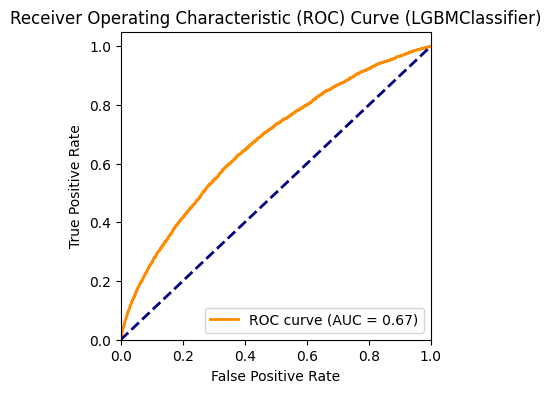

<IPython.core.display.Javascript object>

In [6]:
model = LGBMClassifier(n_jobs=-1, class_weight="balanced", use_missing=False)
final_pipe = Pipeline(steps=[("model", model)])


final_pipe.fit(X_train, y_train)
y_pred = final_pipe.predict(X_test)
y_pred_prob = final_pipe.predict_proba(X_test)[:, 1]
print("\n\n\nProbability: ", y_pred_prob)

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Calculate ROC-AUC score
roc_auc = roc_auc_score(y_test, y_pred_prob)
print("\n\n\nROC_AUC score: ", roc_auc)

plt.figure(figsize=(4, 4))
plt.plot(fpr, tpr, color="darkorange", lw=2, label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve (LGBMClassifier)")
plt.legend(loc="lower right")
plt.show()

<Figure size 800x800 with 0 Axes>

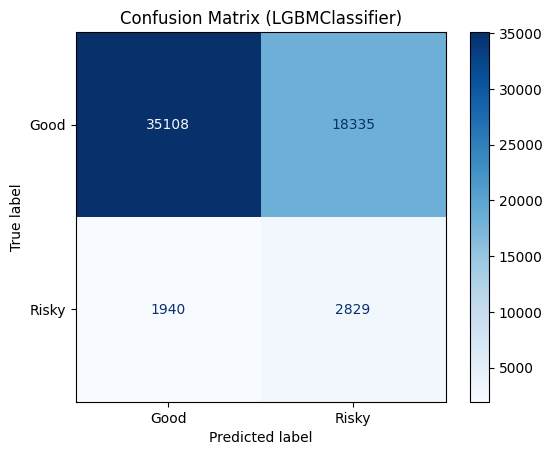

Classification report (LGBMClassifier):
---------------------------
               precision    recall  f1-score   support

        Good       0.95      0.66      0.78     53443
       Risky       0.13      0.59      0.22      4769

    accuracy                           0.65     58212
   macro avg       0.54      0.63      0.50     58212
weighted avg       0.88      0.65      0.73     58212



<IPython.core.display.Javascript object>

In [7]:
cm = confusion_matrix(y_test, y_pred)
clr = classification_report(y_test, y_pred, target_names=["Good", "Risky"])
plt.figure(figsize=(8, 8))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=final_pipe.classes_)
disp.plot(cmap="Blues", values_format="d")
plt.xticks(np.arange(2), ["Good", "Risky"])
plt.yticks(np.arange(2), ["Good", "Risky"])
plt.title("Confusion Matrix (LGBMClassifier)")
plt.show()
print("Classification report (LGBMClassifier):\n---------------------------\n", clr)

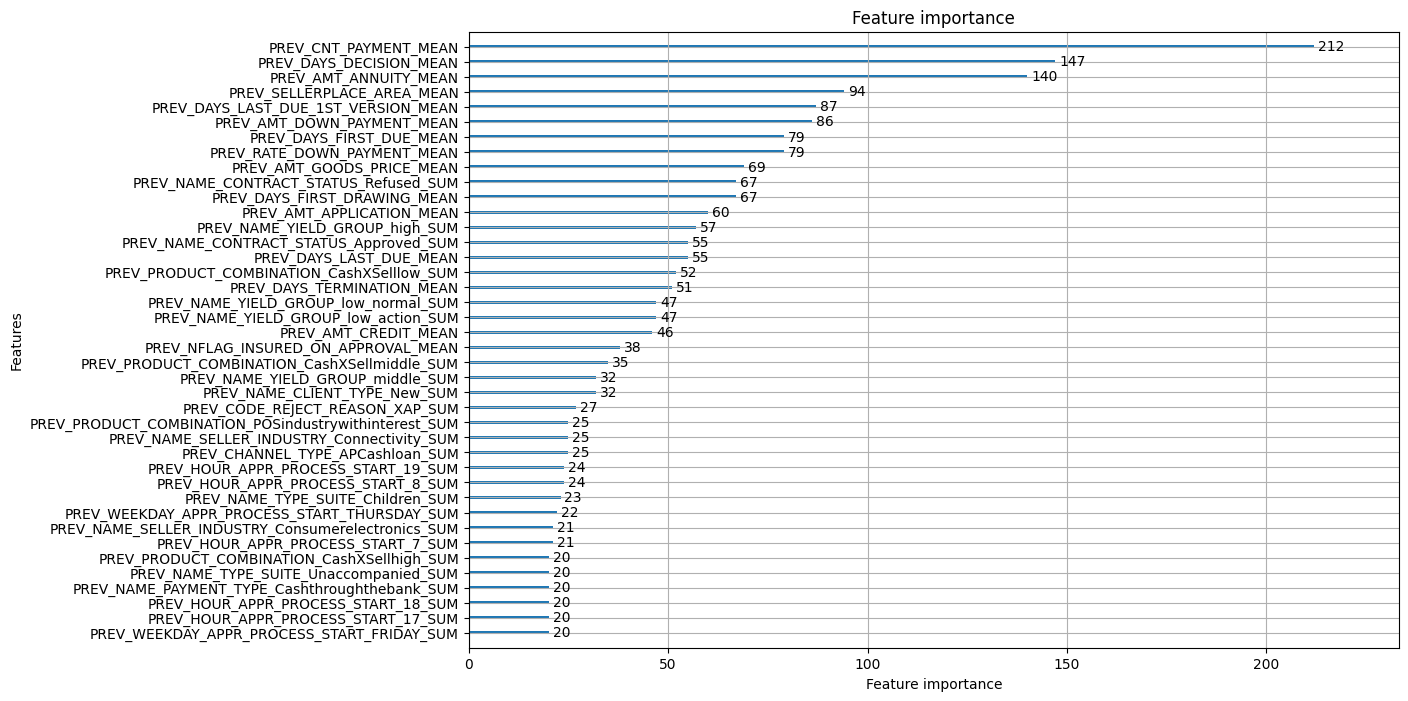

<IPython.core.display.Javascript object>

In [8]:
model_lgb = final_pipe.named_steps["model"]
lgb.plot_importance(model_lgb, figsize=(12, 8), max_num_features=40)
plt.show()

In [9]:
feature_imp = pd.DataFrame(
    sorted(zip(model_lgb.feature_importances_, X_train.columns)),
    columns=["Value", "Feature"],
)
features_df_prev = feature_imp.sort_values(by="Value", ascending=False)
selected_features_prev = list(
    features_df_prev[features_df_prev["Value"] >= 50]["Feature"]
)
prev_selected = prev_target_copy[["SK_ID_CURR"] + selected_features_prev]
prev_selected.to_csv("previous_appcations_selected_features.csv", index=False, quoting=QUOTE_NONNUMERIC, quotechar='"')
prev_selected.head()

,SK_ID_CURR,PREV_CNT_PAYMENT_MEAN,PREV_DAYS_DECISION_MEAN,PREV_AMT_ANNUITY_MEAN,PREV_SELLERPLACE_AREA_MEAN,PREV_DAYS_LAST_DUE_1ST_VERSION_MEAN,PREV_AMT_DOWN_PAYMENT_MEAN,PREV_RATE_DOWN_PAYMENT_MEAN,PREV_DAYS_FIRST_DUE_MEAN,PREV_AMT_GOODS_PRICE_MEAN,PREV_NAME_CONTRACT_STATUS_Refused_SUM,PREV_DAYS_FIRST_DRAWING_MEAN,PREV_AMT_APPLICATION_MEAN,PREV_NAME_YIELD_GROUP_high_SUM,PREV_NAME_CONTRACT_STATUS_Approved_SUM,PREV_DAYS_LAST_DUE_MEAN,PREV_PRODUCT_COMBINATION_CashXSelllow_SUM,PREV_DAYS_TERMINATION_MEAN
0,100002,24.000000,-606.0,9251.775391,500.000000,125.000000,0.000000,0.000000,-565.000000,179055.000,0.0,365243.0,179055.00,0.0,1.0,-25.000000,0.0,-17.000000
1,100003,10.000000,-1305.0,56553.988281,533.000000,-1004.333313,3442.500000,0.050018,-1274.333374,435436.500,0.0,365243.0,435436.50,0.0,3.0,-1054.333374,1.0,-1047.333374
2,100004,4.000000,-815.0,5357.250000,30.000000,-694.000000,4860.000000,0.212036,-784.000000,24282.000,0.0,365243.0,24282.00,0.0,1.0,-724.000000,0.0,-714.000000
3,100006,23.000000,-272.5,23651.173828,894.222229,91584.000000,34840.171875,0.163330,91066.500000,408304.875,1.0,365243.0,272203.25,2.0,5.0,182477.500000,2.0,182481.750000
4,100007,20.671875,-1223.0,12278.804688,409.166656,-837.200012,3390.750000,0.159546,-1263.199951,150530.250,0.0,365243.0,150530.25,3.0,6.0,72136.203125,0.0,72143.796875


<IPython.core.display.Javascript object>

In [35]:
final_pipe_xgb = Pipeline(steps=[("model", XGBClassifier(n_jobs=-1))])
final_pipe_xgb.fit(X_train, y_train)
y_pred_xgb = final_pipe_xgb.predict(X_test)
report_xgb = classification_report(y_test, y_pred_xgb)
print("Classification Report:\n", report_xgb)

y_pred_prob_xgb = final_pipe_xgb.predict_proba(X_test)[:, 1]
roc_auc_xgb = roc_auc_score(y_test, y_pred_prob_xgb)
print("XGBoost ROC AUC:", roc_auc_xgb)

Classification Report:
               precision    recall  f1-score   support

         0.0       0.92      1.00      0.96     53443
         1.0       0.43      0.01      0.01      4769

    accuracy                           0.92     58212
   macro avg       0.67      0.50      0.48     58212
weighted avg       0.88      0.92      0.88     58212

XGBoost ROC AUC: 0.6560982303947531


<IPython.core.display.Javascript object>